### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

## Assignment: COVID-19 data

## Context and Backgroud
The government wants to identify trends and patterns that can be used to inform its marketing approach to increase the number of fully vaccinated people.

The government would like to understand:
What the total vaccinations (first dose, second dose per region, total and overtime) are for a particular region.
Where they should target the first marketing campaign(s) based on:
area(s) with the largest number of people who have received a first dose but no second dose
which area has the greatest number of recoveries so that they can avoid this area in their initial campaign runs
whether deaths have been increasing across all regions over time or if a peak has been reached.
What other types of Twitter data points and tweets have both #coronavirus and #vaccinated hashtags.
Which regions have experienced a peak in hospitalisation numbers and if there are regions that have not reached a peak yet. Demonstrate if the provided functions can assist you to answer these questions. Provide reasons for your answer.


In [2]:
# Import the required libraries and set the plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(15,10)})

### Report submission:
Please see link to Github repository below as well a screenshot of landing page
- [My Github Repo](https://github.com/danthorneloe/LSE_DA_COVID_analysis)

My Github screenshot
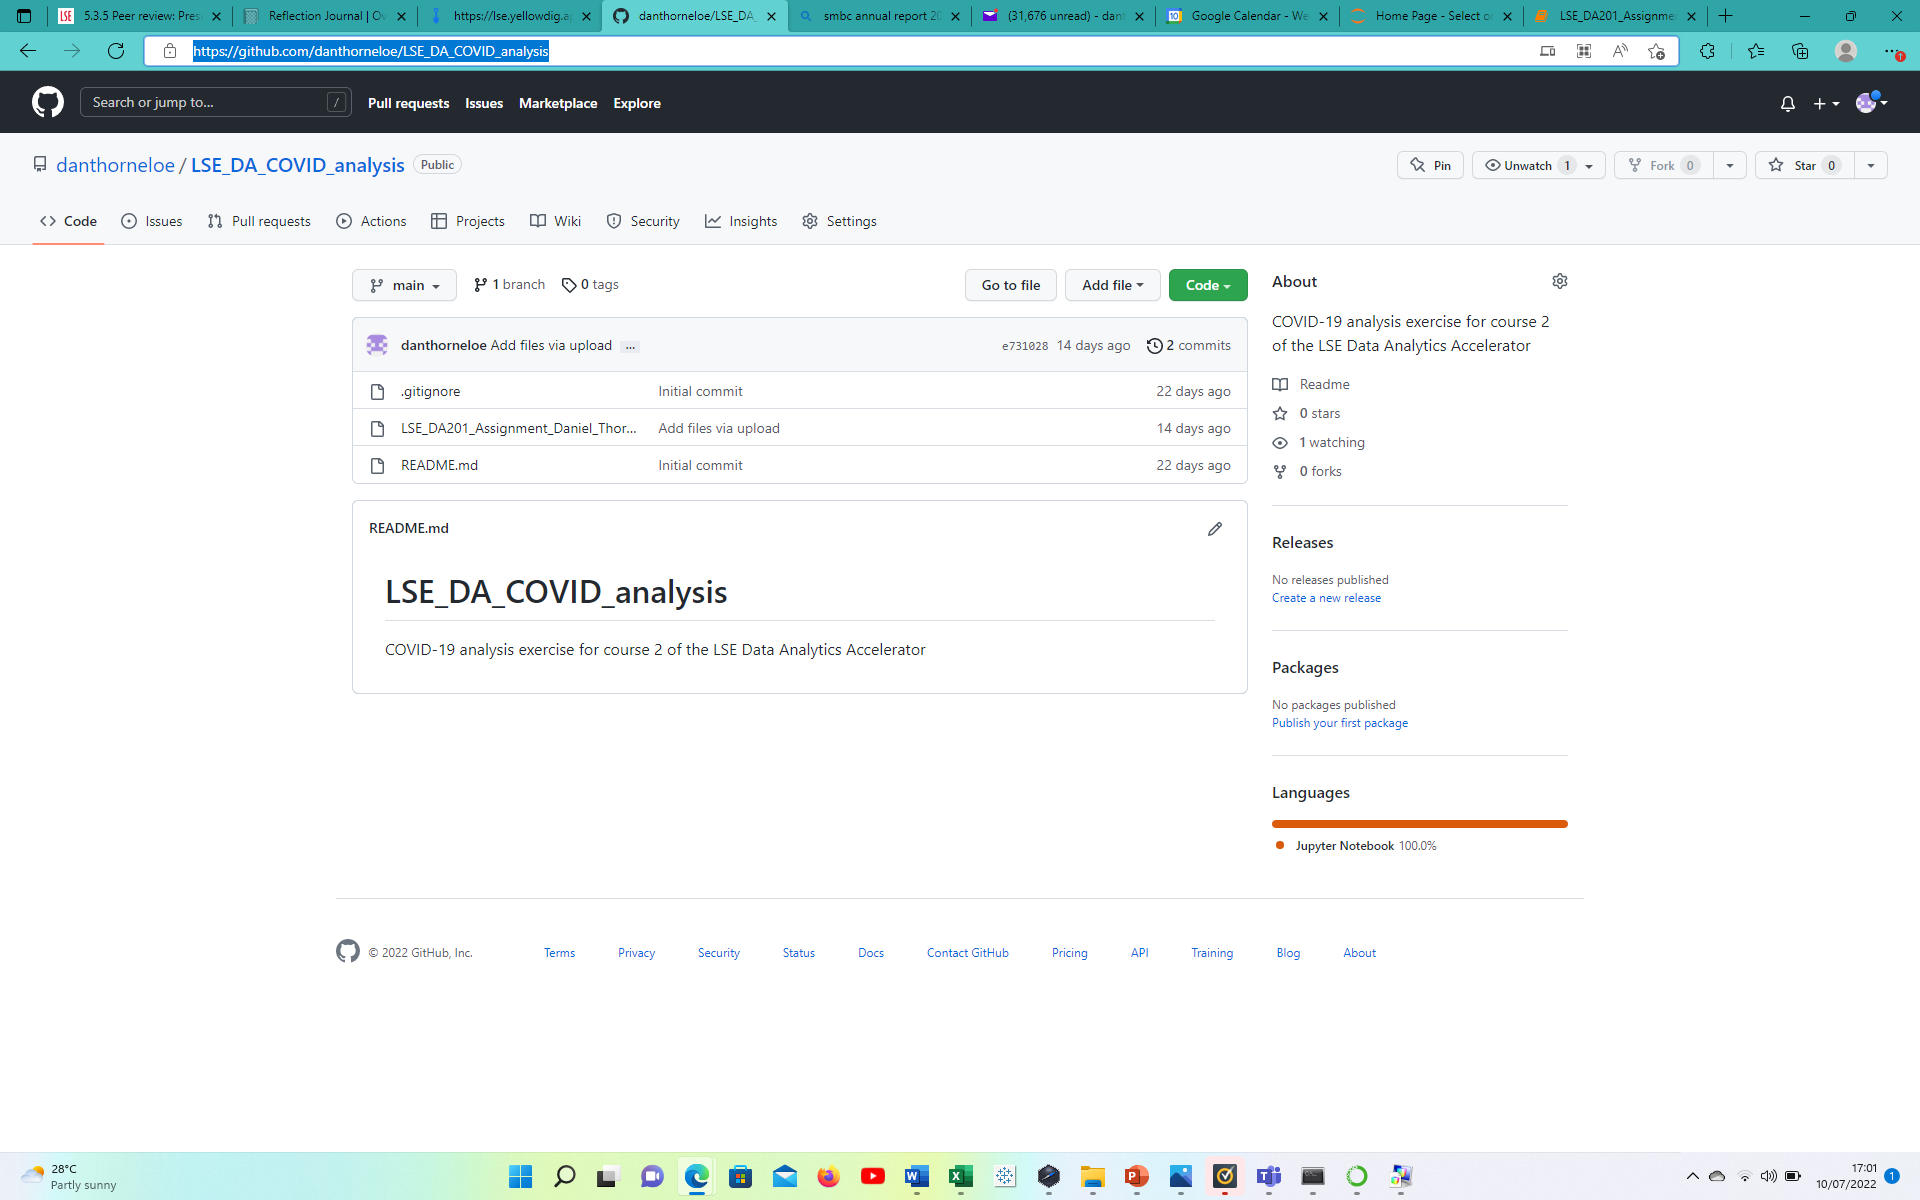


Workflow tools such as GitHub can add value to organisations in a number of ways:
- Encourage collaboration and efficient team working by providing a simple yet powerful tool to manage coding projects across multiple individuals. Central to this is… 
- Version control. By allowing users to take copies (branches) of the core code programmers can work on elements in parallel and then merge updated code with the core code by ‘committing’ changes, a process that allows for oversight and provides automated conflict checking. 
- Reverse changes. Mistakes can easily be reversed as previous versions of the code are stored
- Sharing best practice. GitHub is a vast repository of public code that can repurposed by other developers.
- Supporting a community. The community is a key source of knowledge and support for programmers to develop so providing better support to their organisations. 


## 2) Assignment activity 2: 

### 2.1) Report expectations:
- Load the files `covid_19_uk_cases.csv` and `covid_19_uk_vaccinated.csv` and explore the data.
- Explore the data using the `info()`, `describe()`, `shape` and `value_counts()` methods, and note the observations regarding data types, number or records and features.
- Identify missing data.
- Filter/subset data.
- Aggregate data (totals and by month).
- Note observations.

In [3]:
# Load the COVID-19 cases and vaccine data sets as cov and vac respectively
cov = pd.read_csv('covid_19_UK_cases.csv')
vac = pd.read_csv('covid_19_UK_vaccinated.csv')

In [5]:
#View the DataFrame
cov

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-10,137735.0,8154306.0,0.0,378.0
7580,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-11,137763.0,8193769.0,0.0,386.0
7581,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-12,137944.0,8231437.0,0.0,386.0
7582,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-13,138080.0,8272883.0,0.0,0.0


In [4]:
#View the DataFrame
vac

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-10,1070,1216,1070
7580,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-11,1300,1604,1300
7581,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-12,1482,2027,1482
7582,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-13,0,0,0


In [7]:
# Output key information of the cov DataFrame
# info() function included shape and dtype info
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7584 non-null   object 
 1   Country/Region            7584 non-null   object 
 2   Lat                       7584 non-null   float64
 3   Long                      7584 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object 
 5   Sub-region Name           7584 non-null   object 
 6   Intermediate Region Code  7584 non-null   int64  
 7   Date                      7584 non-null   object 
 8   Deaths                    7582 non-null   float64
 9   Cases                     7582 non-null   float64
 10  Recovered                 7582 non-null   float64
 11  Hospitalised              7582 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 711.1+ KB


# Observations
- 2 null values present in data set in columns 8 to 11. Note addressed in later sections. 

In [8]:
# Output key information of the vac DataFrame
vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7584 non-null   object 
 1   Country/Region            7584 non-null   object 
 2   Lat                       7584 non-null   float64
 3   Long                      7584 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object 
 5   Sub-region Name           7584 non-null   object 
 6   Intermediate Region Code  7584 non-null   int64  
 7   Date                      7584 non-null   object 
 8   Vaccinated                7584 non-null   int64  
 9   First Dose                7584 non-null   int64  
 10  Second Dose               7584 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 651.9+ KB


In [12]:
#view basic stats for DataFrame
cov.describe()

,Lat,Long,Intermediate Region Code,Deaths,Cases,Recovered,Hospitalised
count,7584.000000,7584.000000,7584.000000,7582.000000,7.582000e+03,7582.000000,7582.000000
mean,21.840267,-41.440047,12.500000,6210.202321,2.147082e+05,454.691242,685.228568
std,28.305518,30.527529,14.009849,24860.790148,1.007557e+06,1010.642337,819.256635
min,-51.796300,-81.254600,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,17.851075,-64.667625,0.000000,0.000000,1.200000e+01,0.000000,105.000000
50%,20.503650,-60.855483,2.500000,1.000000,1.685000e+02,13.000000,390.000000
75%,39.448675,-5.152225,29.000000,25.000000,1.585000e+03,312.000000,955.750000
max,55.378100,-2.364400,29.000000,138237.000000,8.317439e+06,8322.000000,4907.000000


In [40]:
#view basic stats for DataFrame
vac.describe()

,Lat,Long,Intermediate Region Code,Vaccinated,First Dose,Second Dose
count,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000
mean,21.840267,-41.440047,12.500000,5913.547600,6192.822257,5913.547600
std,28.305518,30.527529,14.009849,10846.410258,11439.883647,10846.410258
min,-51.796300,-81.254600,0.000000,0.000000,0.000000,0.000000
25%,17.851075,-64.667625,0.000000,0.000000,0.000000,0.000000
50%,20.503650,-60.855483,2.500000,0.000000,0.000000,0.000000
75%,39.448675,-5.152225,29.000000,8338.000000,7505.500000,8338.000000
max,55.378100,-2.364400,29.000000,69619.000000,94038.000000,69619.000000


# Observations 
- Potential outliers for max deaths in cov as 138k deaths is outside IQR. Recovered and hospitalised seem to be well below deaths, further investigation required. Vaccinated means received both doses. 
- 25% and 50% percentile show data is neagtively skewed i.e. ~0 reading for fist half of data set 

In [76]:
# get the row of max deaths
cov.loc[cov['Deaths'].idxmax()]

Province/State                       Others
Country/Region               United Kingdom
Lat                                 55.3781
Long                                 -3.436
ISO 3166-1 Alpha 3-Codes                GBR
Sub-region Name             Northern Europe
Intermediate Region Code                  0
Date                             2021-10-14
Deaths                             138237.0
Cases                             8317439.0
Recovered                               0.0
Hospitalised                            0.0
Name: 7583, dtype: object

In [77]:
# View Others outlier data
uk_cov_df= cov[cov['Province/State'] == 'Others']
pd.set_option("display.max_rows", None)
uk_cov_df

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
6952,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-22,0.0,0.0,0.0,0.0
6953,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-23,0.0,0.0,0.0,0.0
6954,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-24,0.0,0.0,0.0,0.0
6955,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-25,0.0,0.0,0.0,0.0
6956,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-26,0.0,0.0,0.0,0.0
6957,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-27,0.0,0.0,0.0,0.0
6958,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-28,0.0,0.0,0.0,0.0
6959,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-29,0.0,0.0,0.0,0.0
6960,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-30,0.0,0.0,0.0,0.0
6961,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-31,0.0,2.0,0.0,0.0


In [78]:
uk_cov_df.describe()

,Lat,Long,Intermediate Region Code,Deaths,Cases,Recovered,Hospitalised
count,6.320000e+02,6.320000e+02,632.0,632.000000,6.320000e+02,632.000000,632.000000
mean,5.537810e+01,-3.436000e+00,0.0,74346.748418,2.565903e+06,6.511076,452.164557
std,8.675488e-13,2.222205e-14,0.0,48504.888849,2.481153e+06,32.602245,504.094517
min,5.537810e+01,-3.436000e+00,0.0,0.000000,0.000000e+00,0.000000,0.000000
25%,5.537810e+01,-3.436000e+00,0.0,40312.250000,2.826042e+05,0.000000,69.750000
50%,5.537810e+01,-3.436000e+00,0.0,59906.000000,1.666695e+06,0.000000,297.500000
75%,5.537810e+01,-3.436000e+00,0.0,127606.000000,4.435449e+06,0.000000,681.000000
max,5.537810e+01,-3.436000e+00,0.0,138237.000000,8.317439e+06,344.000000,2159.000000


In [79]:
#View 'Others' oulier data
uk_vac_df= vac[vac['Province/State'] == 'Others']
pd.set_option("display.max_rows", None)
uk_vac_df

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
6952,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-22,0,0,0
6953,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-23,0,0,0
6954,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-24,0,0,0
6955,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-25,0,0,0
6956,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-26,0,0,0
6957,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-27,0,0,0
6958,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-28,0,0,0
6959,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-29,0,0,0
6960,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-30,0,0,0
6961,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2020-01-31,0,0,0


In [80]:
uk_vac_df.describe()

,Lat,Long,Intermediate Region Code,Vaccinated,First Dose,Second Dose
count,6.320000e+02,6.320000e+02,632.0,632.000000,632.000000,632.000000
mean,5.537810e+01,-3.436000e+00,0.0,3902.957278,4087.264241,3902.957278
std,8.675488e-13,2.222205e-14,0.0,6793.394019,7166.390306,6793.394019
min,5.537810e+01,-3.436000e+00,0.0,0.000000,0.000000,0.000000
25%,5.537810e+01,-3.436000e+00,0.0,0.000000,0.000000,0.000000
50%,5.537810e+01,-3.436000e+00,0.0,0.000000,0.000000,0.000000
75%,5.537810e+01,-3.436000e+00,0.0,6421.250000,5495.000000,6421.250000
max,5.537810e+01,-3.436000e+00,0.0,30632.000000,41377.000000,30632.000000


# Observations 
- Others is GBR as has deaths far higher than other provinces so may cause issues with visualisation.
- 'Recovered' data for GBR is blank. No suitable proxy given scale of GBR so ignore for now.


In [19]:
# check no missing values in province column
cov['Province/State'].isnull().sum()

0

In [18]:
#number of unique provinces in data set
print(len(cov['Province/State'].unique()))
print(cov['Province/State'].unique())

12
['Anguilla' 'Bermuda' 'British Virgin Islands' 'Cayman Islands'
 'Channel Islands' 'Falkland Islands (Malvinas)' 'Gibraltar' 'Isle of Man'
 'Montserrat' 'Saint Helena, Ascension and Tristan da Cunha'
 'Turks and Caicos Islands' 'Others']


In [21]:
# Check for missing values in cov
cov_na = cov[cov.isna().any(axis=1)]

cov_na.shape

(2, 12)

In [22]:
# Check for missing values in vac
vac_na = vac[vac.isna().any(axis=1)]

vac_na.shape

(0, 11)

In [23]:
#Show lines with missing data 
cov_na

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
875,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-21,NaN,NaN,NaN,NaN
876,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-22,NaN,NaN,NaN,NaN


In [26]:
#filter bermuda data only

bermuda_df= cov[cov['Province/State'] == 'Bermuda']

bermuda_df

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
632,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-01-22,0.0,0.0,0.0,0.0
633,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-01-23,0.0,0.0,0.0,0.0
634,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-01-24,0.0,0.0,0.0,0.0
635,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-01-25,0.0,0.0,0.0,0.0
636,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1259,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2021-10-10,89.0,5501.0,0.0,412.0
1260,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2021-10-11,89.0,5501.0,0.0,421.0
1261,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2021-10-12,92.0,5536.0,0.0,421.0
1262,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2021-10-13,92.0,5536.0,0.0,0.0


# Observations 
- 2 rows in the cov dataset contain NaN in the data set. Replaced later on.

# Question 1 
- Total vaccinations for a region


In [37]:
#Investigate difference between first and second doses for vac data 
#View vac data
vac.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0,0,0


In [10]:
# sum vacination by province. N.B sum as assumed daily data 
vac_sum =vac.groupby('Province/State')['Vaccinated', 'First Dose', 'Second Dose'].sum()

#add new column to to show difference in first dose vs second dose
vac_sum["% not received 2nd dose"] = ((vac_sum["First Dose"] - vac_sum["Second Dose"]) / vac_sum["First Dose"]) *100
vac_sum

C:\Users\danth\AppData\Local\Temp/ipykernel_11596/3032654444.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vac_sum =vac.groupby('Province/State')['Vaccinated', 'First Dose', 'Second Dose'].sum()


,Vaccinated,First Dose,Second Dose,% not received 2nd dose
Province/State,,,,
Anguilla,4709072,4931470,4709072,4.509771
Bermuda,2690908,2817981,2690908,4.509363
British Virgin Islands,4933315,5166303,4933315,4.509763
Cayman Islands,3363624,3522476,3363624,4.509669
Channel Islands,3139385,3287646,3139385,4.509640
Falkland Islands (Malvinas),3587869,3757307,3587869,4.509560
Gibraltar,5606041,5870786,5606041,4.509532
Isle of Man,4036345,4226984,4036345,4.510048
Montserrat,5157560,5401128,5157560,4.509577


In [100]:
# max vacination by province. shows max vaccination given in single day
vac_sum =vac.groupby('Province/State')['Vaccinated', 'First Dose', 'Second Dose'].max()

vac_sum

,Vaccinated,First Dose,Second Dose
Province/State,,,
Anguilla,58480,78992,58480
Bermuda,33417,45138,33417
British Virgin Islands,61265,82754,61265
Cayman Islands,41771,56423,41771
Channel Islands,38987,52662,38987
Falkland Islands (Malvinas),44556,60185,44556
Gibraltar,69619,94038,69619
Isle of Man,50126,67708,50126
Montserrat,64049,86515,64049


# Observations
- This data seems really odd. All provinces have exatly the same ratio of second to first dose.
- 4.5% of population have not had their second dose by end of sample 
- Checked in excel and data is correct, data could be modelled rather than actual
- Assumed vac data was daily count of vacinations given as numbers fall over time so summed. However these numbers are huge\
  Gribralter does not have 5.6m people to vaccinate it has 34k! Cant be cumulative data as values fall over time so must be data issue. 
- Checking by running max function and in excel. If data is daily vacinations then in a single day 20/3/2021, 94038 receive a first does. 3x the population of Gibraltar. 
- Proceeding to use Gibraltar as suggested in Assignment


# Visualise Gibraltar data 

In [13]:
# Create DataFrame based on Gibraltar data
gibraltar_cov = cov[cov['Province/State'] == 'Gibraltar']
#pd.set_option("display.max_rows", None)
gibraltar_cov.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0.0,0.0,0.0,0.0
3793,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0.0,0.0,0.0,0.0
3794,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0.0,0.0,0.0,0.0
3795,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0.0,0.0,0.0,0.0
3796,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0.0,0.0,0.0,0.0


In [14]:
#subset data frame, remove redundant columns
gibraltar_cov_subset = gibraltar_cov [['Date','Deaths', 'Cases', 'Recovered','Hospitalised']]

#Data already sorted by date but code below if needed
#gibraltar_subset.sort_values(by=['Date'], inplace=True, ascending=False)

#view data
gibraltar_cov_subset.head()

,Date,Deaths,Cases,Recovered,Hospitalised
3792,2020-01-22,0.0,0.0,0.0,0.0
3793,2020-01-23,0.0,0.0,0.0,0.0
3794,2020-01-24,0.0,0.0,0.0,0.0
3795,2020-01-25,0.0,0.0,0.0,0.0
3796,2020-01-26,0.0,0.0,0.0,0.0


In [132]:
#Show basic stats
gibraltar_cov_subset.describe()

,Deaths,Cases,Recovered,Hospitalised
count,632.000000,632.000000,632.000000,632.000000
mean,40.208861,2237.109177,1512.821203,1027.625000
std,45.332832,2136.268090,1817.096755,1145.681058
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,177.000000,109.500000,157.750000
50%,5.000000,1036.500000,323.500000,675.500000
75%,94.000000,4286.000000,4122.500000,1548.000000
max,97.000000,5727.000000,4670.000000,4907.000000


Text(0.5, 1.0, 'Cases over time')

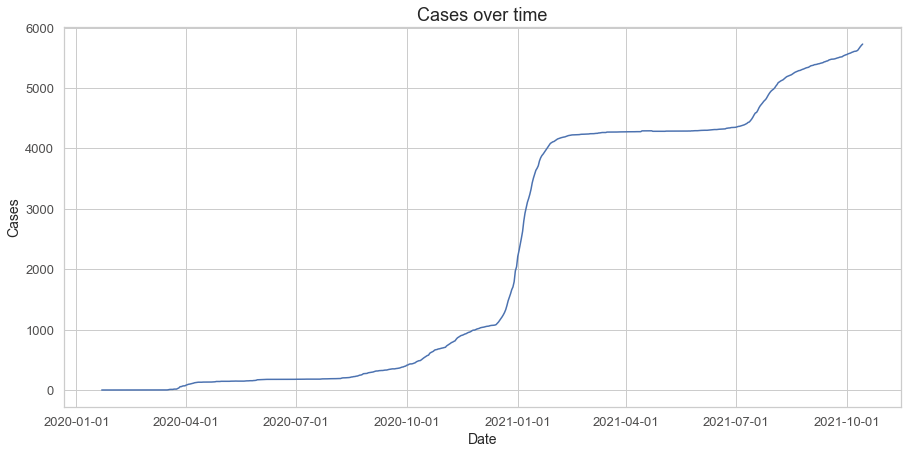

In [91]:
# Explore Gibraltar behaviour over time
# import required packages
import matplotlib.dates as md

# convert 'date' column type from str to datetime
gibraltar_cov_subset['Date'] = pd.to_datetime(gibraltar_cov_subset['Date'], format = '%Y-%m-%d')

#show cases over time
# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# plot cases vs time
sns.lineplot(ax = ax, x='Date', y='Cases', data=gibraltar_cov_subset).set_title('Cases over time')

# specify the position of the major ticks at quartely intervals
ax.xaxis.set_major_locator(md.MonthLocator(interval=3))

# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

# (optional) rotate by 90° the labels in order to improve their spacing
# plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)



Text(0.5, 1.0, 'Hosiptalised over time')

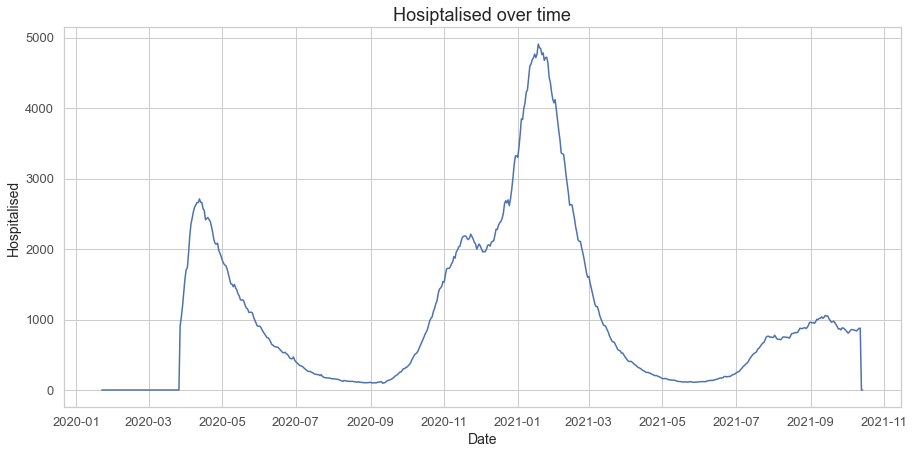

In [82]:
# show hospitalised over time
# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# plot hospitalised vs time
sns.lineplot(ax = ax, x='Date', y='Hospitalised', data=gibraltar_cov_subset).set_title('Hosiptalised over time')



Text(0.5, 1.0, 'Gibraltar Recovered over time')

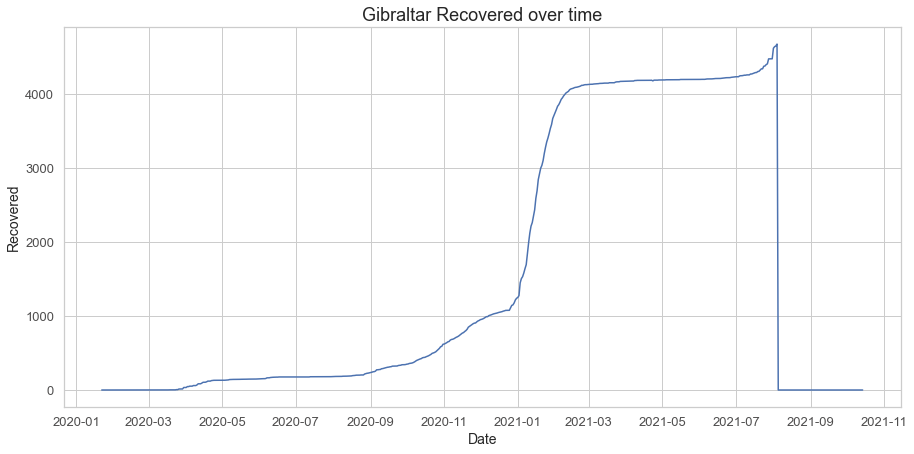

In [101]:
# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# plot deaths vs time
sns.lineplot(ax = ax, x='Date', y='Recovered', data=gibraltar_cov_subset).set_title('Gibraltar Recovered over time')


Text(0.5, 1.0, 'Gibraltar Deaths over time')

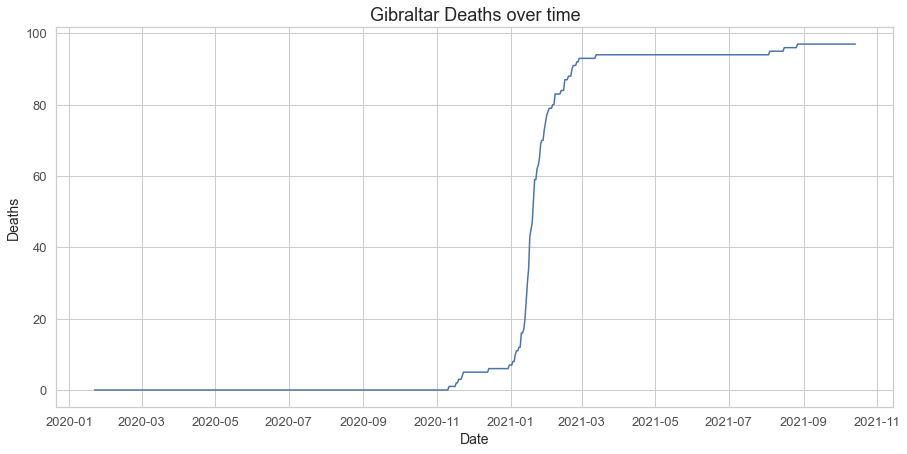

In [87]:
# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# plot deaths vs time
sns.lineplot(ax = ax, x='Date', y='Deaths', data=gibraltar_cov_subset).set_title('Gibraltar Deaths over time')


In [20]:
#create data frame for vaccination data
gibraltar_vac = vac[vac['Province/State'] == 'Gibraltar']
gibraltar_vac.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0,0,0
3793,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0,0,0
3794,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0,0,0
3795,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0,0,0
3796,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0,0,0


In [21]:
#subset vaccination data frame 
gibraltar_vac_subset = gibraltar_vac [['Date','Vaccinated', 'First Dose', 'Second Dose']]
gibraltar_vac_subset.head()

,Date,Vaccinated,First Dose,Second Dose
3792,2020-01-22,0,0,0
3793,2020-01-23,0,0,0
3794,2020-01-24,0,0,0
3795,2020-01-25,0,0,0
3796,2020-01-26,0,0,0


Text(0.5, 1.0, 'Gibraltar First Dose over time')

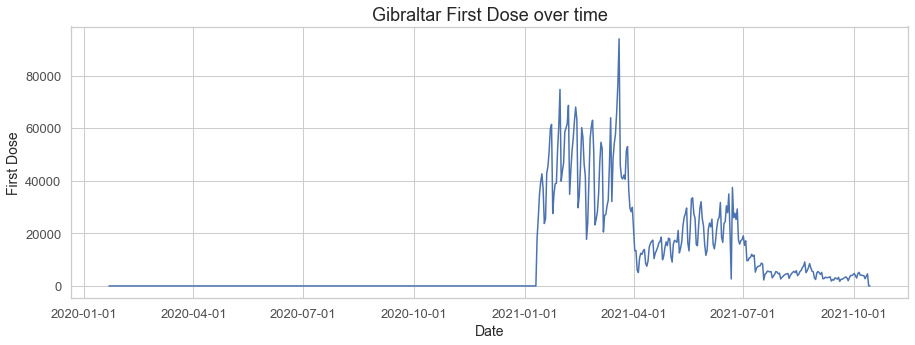

In [83]:
# convert 'date' column type from str to datetime
gibraltar_vac_subset['Date'] = pd.to_datetime(gibraltar_vac_subset['Date'], format = '%Y-%m-%d')

# prepare the figure
fig, ax = plt.subplots(figsize = (15, 5))

# plot first dose vs time
sns.lineplot(ax = ax, x='Date', y='First Dose', data=gibraltar_vac_subset).set_title('Gibraltar First Dose over time')

# specify the position of the major ticks at quartely intervals
ax.xaxis.set_major_locator(md.MonthLocator(interval=3))

# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))


Text(0.5, 1.0, 'Gibraltar Second Dose over time')

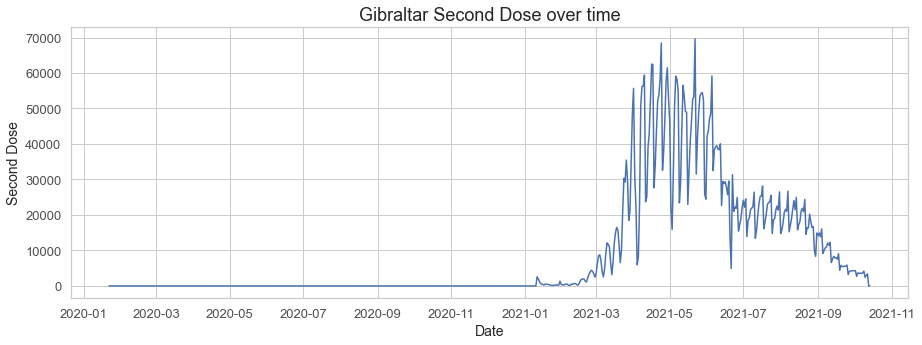

In [86]:
# prepare the figure
fig, ax = plt.subplots(figsize = (15, 5))

# plot second dose vs time
sns.lineplot(ax = ax, x='Date', y='Second Dose', data=gibraltar_vac_subset).set_title('Gibraltar Second Dose over time')



# Observations questions
#Did you notice anything interesting about the data?
- Some data is appears to be cumulative e.g. deaths. We know that the vaccine was very successful at preventing death so if this was not cumulative daily values should drop but curve gradient is never negative. On the other hand Hospitlisation data is noisy suggesting a daily count of hopitalised. Implications. For total deaths you take the max of the data; for total hospitalisations you take the sum of the data. Explored more later.
- Only two records with missing data - bermuda

#Does the DataFrame have a default index? 
- Yes it sets a count 

#What are some of the initial insights you've discovered?
- Hospitalised show spike in April 2020 with only a relatively minor jump in cases as COVID is new protections not in place. No rise in Deaths recorded though so was worth exploring e.g. non-covid hospitalisation or Death data issue
- Cases rise sharply from end of 2020 
- Hospitalisations rise sharply in Q1 2021
- Deaths rise sharply in Q1 2021
- Recovered follows cases with lag. N.B. data stops being recorded August 2021.
- Immunisation programme start Q1 2021
- High rated in immunisation leads to hosipitalisation falling and deaths (assume cumulative) holding at ~90.
- Vaccine porgramme keeps hospitalisations low and deaths low untilcases, hospitalisations and dealth begin to rise again in Q4 2021 as either vaccine effectiveness falls (particularly the 4.5% not taking the second dose) or new varient arrives

#How has the number of vaccinated individuals changed over time? What might these changes indicate? Include reasons to support your rationale.
- The number vaccinated (first or second) follows the same pattern of initial high rates (70k max) then dropping to a steady 20k on average before tailing off. The variability of the data is interesting suggesting consistantly repeated pushed to vaccinate either driven by campaigns or logistics e.g. weekly supply of vaccine. As noted above ~4.5% overall of those receiving the first dose do not take the second.  

#On which date(s) are there values missing, and from which columns and rows are these values missing? Which states or provinces do the missing values belong to?
 - Bermuda (rows 875, 876). Missing Deaths, Recovered, Hospitalisation, Cases data
 
#Is there anything unusual about the filtered Gilbraltar DataFrame? Include reasons to support your rationale.
- as stated earlier the volumes, which ever way you look at it, are too high for a population of 34k so I would urgently go back to the data owner to understand better.


## 3) Assignment activity 3: 

### 3.1) Report expectations:
- Merge and explore the data.
- Convert the data type of the Date column from object to DateTime.
- Create a data set that meets the expected parameters.
- Add calculated features to DataFrames (difference between first and second dose vaccinations).
- Filter and sort output.
- Observe totals and percentages as a total and over time.
- Note observations.

Merge the DataFrames without duplicating columns. The new DataFrame (e.g. `covid`) will have `7584` rows and the following columns: `Province/State, Country/Region, Date, Vaccinated, First Dose, Second Dose, Deaths, Cases, Recovered, Hospitalised`.

In [ ]:
# Join the DataFrames as covid where you merge cov and vac

In [27]:
#show colums in both data frames to idneitify merge key
print(cov.columns)
print(vac.columns)


Index(['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name',
       'Intermediate Region Code', 'Date', 'Deaths', 'Cases', 'Recovered',
       'Hospitalised'],
      dtype='object')
Index(['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name',
       'Intermediate Region Code', 'Date', 'Vaccinated', 'First Dose',
       'Second Dose'],
      dtype='object')


In [28]:
#new vac data frame with required colums only i.e remove duplicate geopgraphic data
vac_reduced = vac.loc[:, 'Vaccinated' : 'Second Dose']
vac_reduced.head()

,Vaccinated,First Dose,Second Dose
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [29]:
# Merge the two DataFrames by index as data is aligned (if not will need to create primary key e.g. date & IRC)
cov_vac = pd.merge(cov, vac_reduced, left_index=True, right_index=True)
cov_vac.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0,0,0,0


In [30]:
# view the shape of the data  
cov_vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7584 non-null   object 
 1   Country/Region            7584 non-null   object 
 2   Lat                       7584 non-null   float64
 3   Long                      7584 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object 
 5   Sub-region Name           7584 non-null   object 
 6   Intermediate Region Code  7584 non-null   int64  
 7   Date                      7584 non-null   object 
 8   Deaths                    7582 non-null   float64
 9   Cases                     7582 non-null   float64
 10  Recovered                 7582 non-null   float64
 11  Hospitalised              7582 non-null   float64
 12  Vaccinated                7584 non-null   int64  
 13  First Dose                7584 non-null   int64  
 14  Second D

In [64]:
# view basic stats of DataFrame
cov_vac.describe()

,Lat,Long,Intermediate Region Code,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
count,7584.000000,7584.000000,7584.000000,7582.000000,7.582000e+03,7582.000000,7582.000000,7584.000000,7584.000000,7584.000000
mean,21.840267,-41.440047,12.500000,6210.202321,2.147082e+05,454.691242,685.228568,5913.547600,6192.822257,5913.547600
std,28.305518,30.527529,14.009849,24860.790148,1.007557e+06,1010.642337,819.256635,10846.410258,11439.883647,10846.410258
min,-51.796300,-81.254600,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.851075,-64.667625,0.000000,0.000000,1.200000e+01,0.000000,105.000000,0.000000,0.000000,0.000000
50%,20.503650,-60.855483,2.500000,1.000000,1.685000e+02,13.000000,390.000000,0.000000,0.000000,0.000000
75%,39.448675,-5.152225,29.000000,25.000000,1.585000e+03,312.000000,955.750000,8338.000000,7505.500000,8338.000000
max,55.378100,-2.364400,29.000000,138237.000000,8.317439e+06,8322.000000,4907.000000,69619.000000,94038.000000,69619.000000


In [31]:
#identify if any null values in dataframe
nan_in_df = cov_vac.isnull().sum()
  
print(nan_in_df)

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      2
Cases                       2
Recovered                   2
Hospitalised                2
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64


In [32]:
# Fix the date column data type
cov_vac['Date'] = cov_vac['Date'].astype(np.datetime64)
cov_vac.dtypes

Province/State                      object
Country/Region                      object
Lat                                float64
Long                               float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date                        datetime64[ns]
Deaths                             float64
Cases                              float64
Recovered                          float64
Hospitalised                       float64
Vaccinated                           int64
First Dose                           int64
Second Dose                          int64
dtype: object

In [33]:
# locate null values

cov_vac.loc[pd.isna(cov_vac["Deaths"]), :].index

Int64Index([875, 876], dtype='int64')

In [34]:
cov_vac.iloc[[875,876]]

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
875,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-21,NaN,NaN,NaN,NaN,0,0,0
876,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-22,NaN,NaN,NaN,NaN,0,0,0


In [110]:
# identify totals for each Province
# need to aggregate with max for cumulative or sum for daily data
cov_vac.groupby("Province/State").agg(Deaths_max=('Deaths', 'max'),\
Cases_max=('Cases', 'max'), Recovered_sum=('Recovered', 'sum'),\
Hospitalised_sum= ('Hospitalised', 'sum')) 

,Deaths_max,Cases_max,Recovered_sum,Hospitalised_sum
Province/State,,,,
Anguilla,1.0,644.0,12708.0,545540.0
Bermuda,95.0,5548.0,363999.0,311547.0
British Virgin Islands,37.0,2725.0,64359.0,571506.0
Cayman Islands,2.0,1011.0,152052.0,389669.0
Channel Islands,100.0,12135.0,1027626.0,363690.0
Falkland Islands (Malvinas),0.0,69.0,14754.0,415650.0
Gibraltar,97.0,5727.0,956103.0,649459.0
Isle of Man,54.0,8343.0,328319.0,467605.0
Montserrat,1.0,41.0,6376.0,597486.0


# Observations
 - Early assumption that deaths and cases were cumlative is false as this data shows; you cant have fewer cases than recovered.
 - Recovered and hospitalisation data cant be cumulative as values drop over time
 - Therefore assume that all data is daily and summed to get total

In [109]:
# identify totals for each Province
# Use sum only
cov_vac.groupby("Province/State").agg(Deaths_sum=('Deaths', 'sum'),\
Cases_sum=('Cases', 'sum'), Recovered_sum=('Recovered', 'sum'),\
Hospitalised_sum= ('Hospitalised', 'sum')) 

,Deaths_sum,Cases_sum,Recovered_sum,Hospitalised_sum
Province/State,,,,
Anguilla,24.0,35315.0,12708.0,545540.0
Bermuda,10353.0,685442.0,363999.0,311547.0
British Virgin Islands,3573.0,284961.0,64359.0,571506.0
Cayman Islands,911.0,217756.0,152052.0,389669.0
Channel Islands,37130.0,1957978.0,1027626.0,363690.0
Falkland Islands (Malvinas),0.0,20482.0,14754.0,415650.0
Gibraltar,25412.0,1413853.0,956103.0,649459.0
Isle of Man,15051.0,887133.0,328319.0,467605.0
Montserrat,539.0,9556.0,6376.0,597486.0


# Observations
 - Although counts are too high for populations the data is at least logically consistent i.e. fewer hospitaliksed than cases

In [108]:
# identify mean death, cases, recoved, hospitlaised for Bermuda for replace NaN
cov_vac.groupby("Province/State").agg(Deaths_mean=('Deaths', 'mean'),\
Cases_mean=('Cases', 'mean'), Recovered_mean=('Recovered', 'mean'),\
Hospitalised_mean= ('Hospitalised', 'mean')) 

,Deaths_mean,Cases_mean,Recovered_mean,Hospitalised_mean
Province/State,,,,
Anguilla,0.037975,55.878165,20.107595,863.196203
Bermuda,16.433333,1088.003175,577.776190,494.519048
British Virgin Islands,5.653481,450.887658,101.833861,904.281646
Cayman Islands,1.441456,344.550633,240.588608,616.564873
Channel Islands,58.750000,3098.066456,1625.990506,575.458861
Falkland Islands (Malvinas),0.000000,32.408228,23.344937,657.674051
Gibraltar,40.208861,2237.109177,1512.821203,1027.625000
Isle of Man,23.814873,1403.691456,519.492089,739.881329
Montserrat,0.852848,15.120253,10.088608,945.389241


In [186]:
# replace Bermuda NaN with means 
cov_vac['Deaths'][cov_vac['Deaths'].isna()] = 16.4
cov_vac['Cases'][cov_vac['Cases'].isna()] = 1.088003e+03
cov_vac['Recovered'][cov_vac['Recovered'].isna()] = 577.8
cov_vac['Hospitalised'][cov_vac['Hospitalised'].isna()] = 494.5
cov_vac.iloc[[875,876]] #check change took place

C:\Users\danth\AppData\Local\Temp/ipykernel_19220/1103955269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cov_vac['Deaths'][cov_vac['Deaths'].isna()] = 16.4
C:\Users\danth\AppData\Local\Temp/ipykernel_19220/1103955269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cov_vac['Cases'][cov_vac['Cases'].isna()] = 1.088003e+03
C:\Users\danth\AppData\Local\Temp/ipykernel_19220/1103955269.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
875,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-21,16.4,1088.003,577.8,494.5,0,0,0
876,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-22,16.4,1088.003,577.8,494.5,0,0,0


# Data wrangling complete


In [ ]:
# Groupby and calculate difference between first and second dose

In [38]:
#add new column to to show difference in first dose vs second dose
cov_vac["First minus Second Dose"] = cov_vac["First Dose"] - cov_vac["Second Dose"]

cov_vac.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose,Delta First vs Second Dose,First minus Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0,0,0,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0,0,0,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0,0,0,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0,0,0,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0,0,0,0,0,0


In [39]:
# sums by province
cov_vac_agg = cov_vac.groupby("Province/State")[["Deaths", "Cases", "Recovered", "Hospitalised", "First Dose", "Second Dose", "First minus Second Dose" ]].sum()
cov_vac_agg

,Deaths,Cases,Recovered,Hospitalised,First Dose,Second Dose,First minus Second Dose
Province/State,,,,,,,
Anguilla,24.0,3.531500e+04,12708.0,545540.0,4931470,4709072,222398
Bermuda,10353.0,6.854420e+05,363999.0,311547.0,2817981,2690908,127073
British Virgin Islands,3573.0,2.849610e+05,64359.0,571506.0,5166303,4933315,232988
Cayman Islands,911.0,2.177560e+05,152052.0,389669.0,3522476,3363624,158852
Channel Islands,37130.0,1.957978e+06,1027626.0,363690.0,3287646,3139385,148261
Falkland Islands (Malvinas),0.0,2.048200e+04,14754.0,415650.0,3757307,3587869,169438
Gibraltar,25412.0,1.413853e+06,956103.0,649459.0,5870786,5606041,264745
Isle of Man,15051.0,8.871330e+05,328319.0,467605.0,4226984,4036345,190639
Montserrat,539.0,9.556000e+03,6376.0,597486.0,5401128,5157560,243568


In [40]:
# Add new column to show % of population receiving second dose
cov_vac_agg["% difference 2nd vs 1st"] = cov_vac_agg['Second Dose'] / cov_vac_agg['First Dose'] * 100
cov_vac_agg

,Deaths,Cases,Recovered,Hospitalised,First Dose,Second Dose,First minus Second Dose,% difference 2nd vs 1st
Province/State,,,,,,,,
Anguilla,24.0,3.531500e+04,12708.0,545540.0,4931470,4709072,222398,95.490229
Bermuda,10353.0,6.854420e+05,363999.0,311547.0,2817981,2690908,127073,95.490637
British Virgin Islands,3573.0,2.849610e+05,64359.0,571506.0,5166303,4933315,232988,95.490237
Cayman Islands,911.0,2.177560e+05,152052.0,389669.0,3522476,3363624,158852,95.490331
Channel Islands,37130.0,1.957978e+06,1027626.0,363690.0,3287646,3139385,148261,95.490360
Falkland Islands (Malvinas),0.0,2.048200e+04,14754.0,415650.0,3757307,3587869,169438,95.490440
Gibraltar,25412.0,1.413853e+06,956103.0,649459.0,5870786,5606041,264745,95.490468
Isle of Man,15051.0,8.871330e+05,328319.0,467605.0,4226984,4036345,190639,95.489952
Montserrat,539.0,9.556000e+03,6376.0,597486.0,5401128,5157560,243568,95.490423


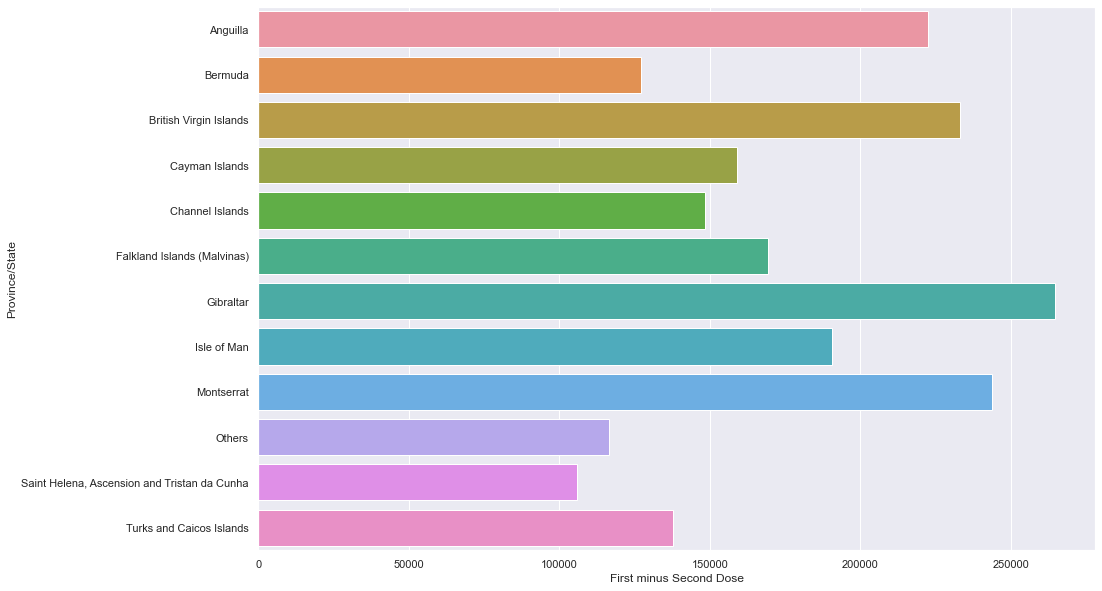

In [46]:
#convert into data frame to add index
cov_vac_agg_df = pd.DataFrame(cov_vac_agg).reset_index()
cov_vac_agg_df.head()

# show barchart of differences by province
ax = sns.barplot(x='First minus Second Dose', y='Province/State', data=cov_vac_agg_df)

# Observations
 - Gibralter has the largest absolute difference between first and second doses and so should be the focus of campaign
 - To enhance analysis I would compare vacination volumes to overall population. I would access populaiton data from external source e.g. governemnt stats api or .csv file 


<AxesSubplot:xlabel='Date', ylabel='Deaths'>

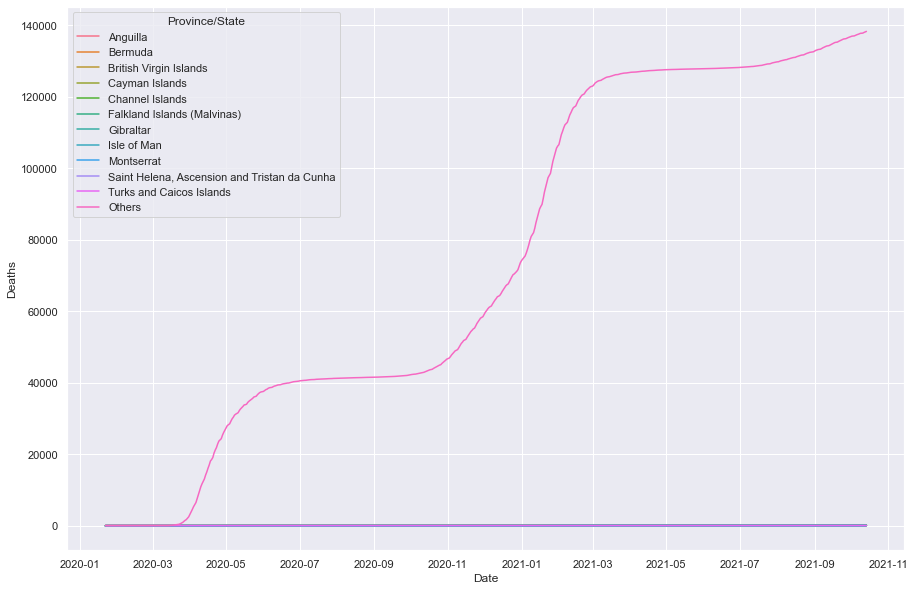

In [50]:
# plot death trend over time all Provinces
sns.lineplot (x='Date', y='Deaths', data=cov_vac, hue='Province/State')

Observation
- Others is outlier 

Text(0.5, 1.0, 'Deaths over time for UK ex.GBR (Others)')

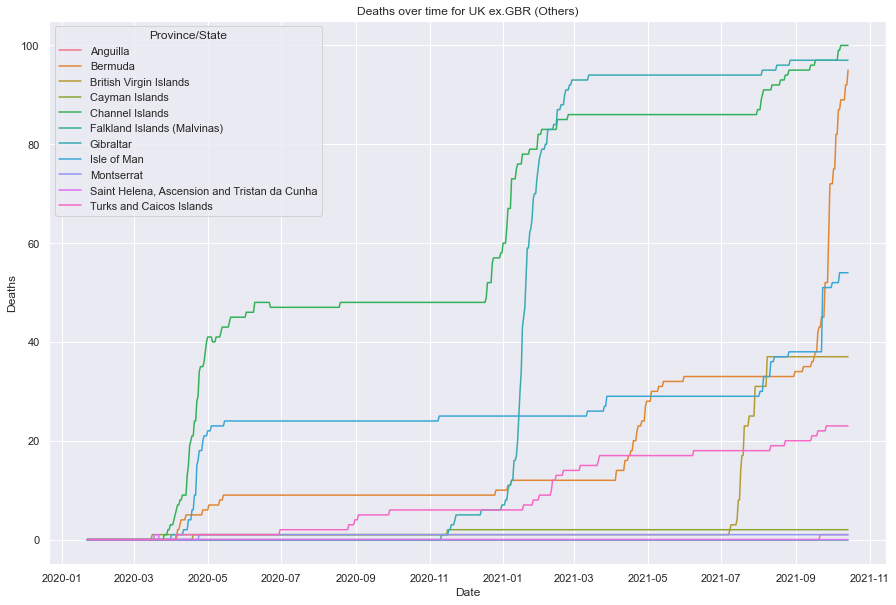

In [63]:
# remove others from visualisation
# idendify index values for rows with 'Others' 
index_names  = cov_vac[cov_vac['Province/State'] == 'Others'].index

#drop these row indicies
cov_vac.drop(index_names, inplace = True)

# replot with reduced df
sns.lineplot (x='Date', y='Deaths', data=cov_vac, hue='Province/State')\
.set_title("Deaths over time for UK ex.GBR (Others)")

#Alternative woudl be to filter the data argement e.g. data=(cov_vac[cov_vac['Province/State'] == 'Bermuda']) 


# Observations 
- Deaths are increasing sharply for Bermuda so most urgent
- Channel islands are rising after plateau so worth observation
- Isle of Man also on rise

Text(0.5, 1.0, 'Recovered over time for UK ex.GBR (Others)')

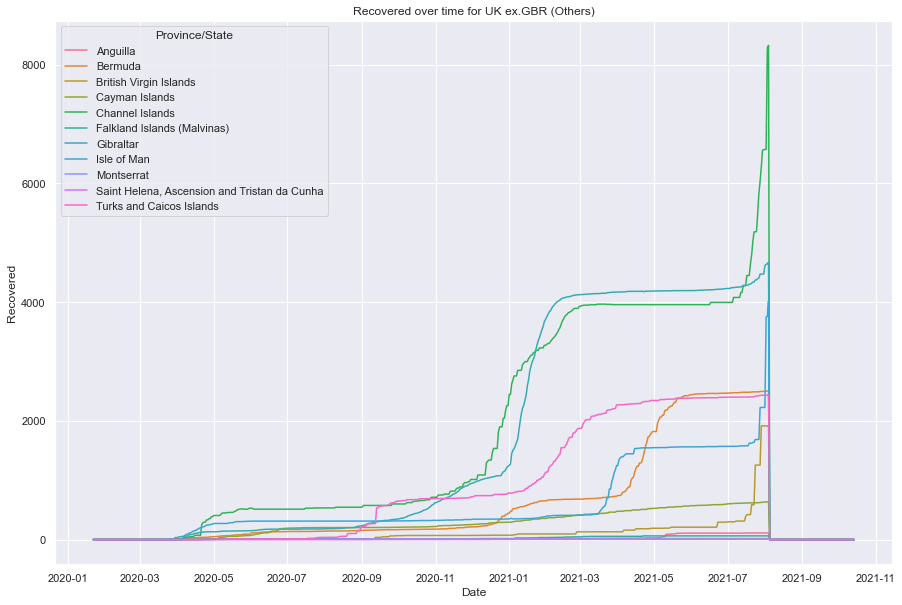

In [62]:
# plot recoveries 
sns.lineplot (x='Date', y='Recovered', data=cov_vac, hue='Province/State')\
.set_title("Recovered over time for UK ex.GBR (Others)")

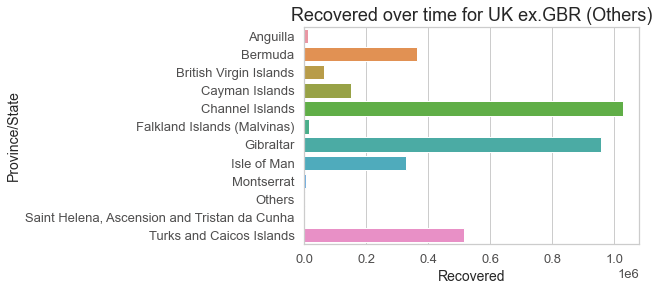

In [105]:
# show barchart of recovered by Provonce as clearer than lineplot 
ax = sns.barplot(x='Recovered', y='Province/State', data=cov_vac_agg_df)\
.set_title("Recovered over time for UK ex.GBR (Others)")

# Observations 
- Channel islands has the highest recovered
- N.B no data for others

Text(0.5, 1.0, 'Hospitalised over time for UK ex.GBR (Others)')

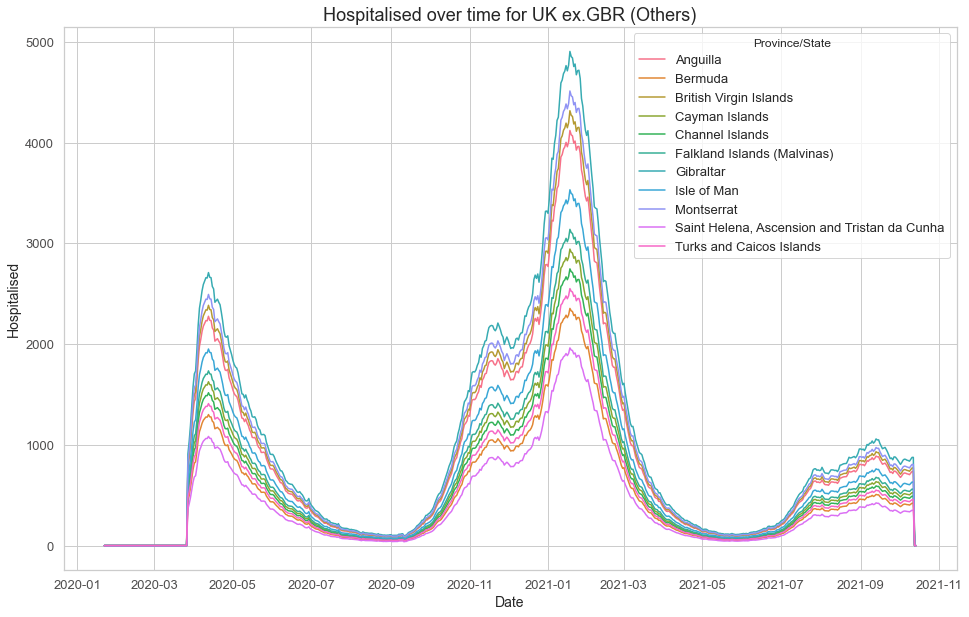

In [98]:
# show hospitalisations
# prepare the figure
fig, ax = plt.subplots(figsize = (16, 10))

# set up the plot
sns.lineplot (ax=ax, x='Date', y='Hospitalised', data=cov_vac, hue='Province/State')\
.set_title("Hospitalised over time for UK ex.GBR (Others)")



Text(0.5, 1.0, 'Cases over time for UK ex.GBR (Others)')

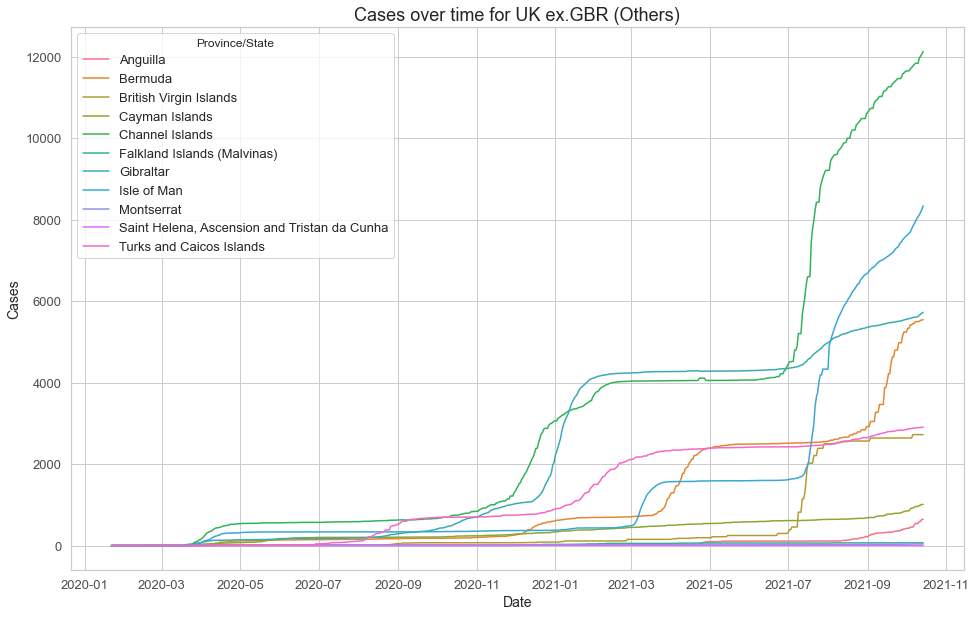

In [111]:
# show hospitalisations
# prepare the figure
fig, ax = plt.subplots(figsize = (16, 10))

# set up the plot
sns.lineplot (ax=ax, x='Date', y='Cases', data=cov_vac, hue='Province/State')\
.set_title("Cases over time for UK ex.GBR (Others)")

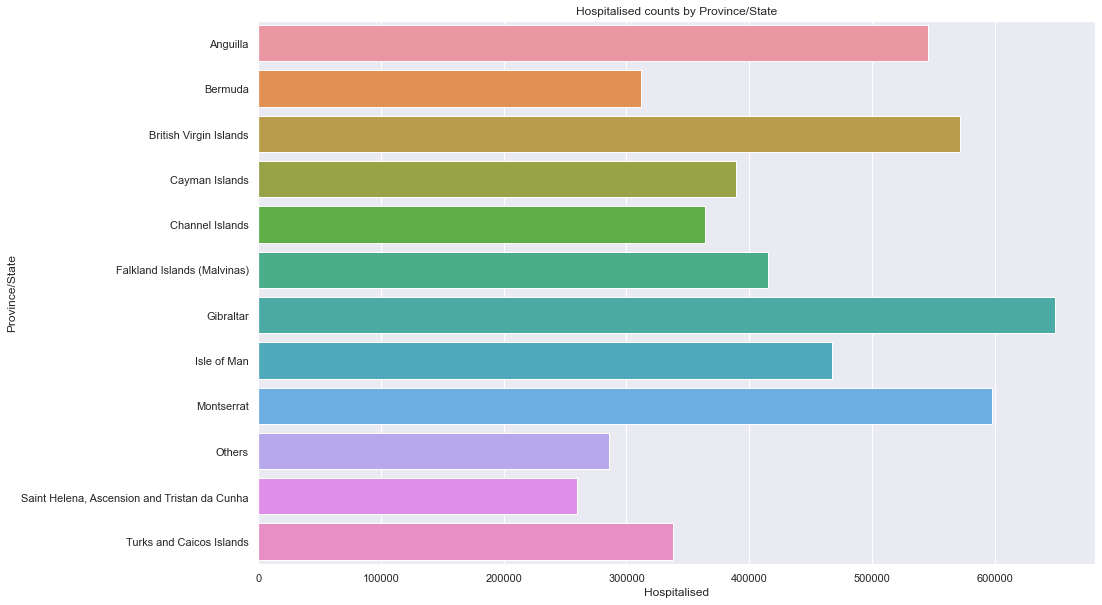

In [65]:
# show barchart of hospitalised by province
ax = sns.barplot(x='Hospitalised', y='Province/State', data=cov_vac_agg_df).set_title("Hospitalised counts by Province/State")

## Observation Questions
Is there a consistent trend running across the data? Are there any groups that are skewed and should be removed?
- Trends are as desvribed earlier. Others is removed as skews data. However as GBR this is likly a scale issue and should not be ignored but analysed seperatley. Alt. normalise data to show all data on same basis.

How are the death rates increasing across regions? Has it reached a peak?
- Deaths are increasing sharply for Bermuda so most urgent
- Channel islands are rising after plateau so worth observation
- Isle of Man also on rise
- The peak is not reached

What is the percentage of the first dose to fully vaccinated individuals?
- ~5% of those who have received the first dose have not received the second; so 95% of first dose recipients are now fully vaccinated 

Can you see any trends across groups (Province/State)?
 - timing if not quantum of hospitalisation is the same which is needs further analysis as....
 - cases and recoveries and deaths are dispersed overtime. Logical link between timing of cases and timing of hospitalisation is is not clear. Dispersed cases timing reflects dispersed geographies and when virus arrived  

Which region has had the most recoveries, and has this been consistent over time?
 - Gibraltar has most recoveries, not consistent over time

Are your visualisation of good quality? How can you improve, for example, the smoothness of the lines?
- They are understandable but the line charts are cluttered given the number of hues. Id add a filter to select certain markets or further breakdown regionally to reduce clutter. Barplots are very clear and useful. To improve futher, I would add all the data to one chart (at a Province or Total level only) to show timing relationships between data but I would need to scale the data to make it comparable.     

How will this visualisation be valuable for the government to use in making informed decisions?
- Spot spiking deaths to target activity
- Spot geographies with high recovery rates to understnad what they might be doing differently to manage the virus
- If first dose/ second date rated where different by region this woudl be an indicator to further invesitigation into best practive to improve other vaaccination campaigns

What would be your future data requirement
- I very unsure about the quantum of the values we are seeing. The levels are not possible given the populations of some of these geographies so I would want to understnad the data better
- I would add in populaiton data to compare these values to the overall population i.e. what % of population is vaccinated.
- GBR, as largest geography, would require regional (e.g. county) breakdown to be useful 

## 5) Assignment activity 5: External data 
In the next section, you were supplied with a sample file and the question was asked to determine whether there are additional `#tags` or keywords that could potentially provide insights into your COVID-19 analysis. While the sample set is limited, you were asked to review the provided file and demonstrate the typical steps and make recommendations regarding future use of similar data sets to provide richer insights.

### 5.1) Report expectations:
- Demonstrate basic ability to work with Twitter data.
- Search for hash-tags or keywords.
- Create DataFrames and visualisations.
- Note your observations.

In [ ]:
#import libraries, already done

In [57]:
# Explore the data: info(), head()
tweets = pd.read_csv('tweets.csv')

In [59]:
# Explore the structure, count the tweets, get the elements of interest
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 3959 non-null   object 
 1   id                         3959 non-null   float64
 2   id_str                     3959 non-null   float64
 3   text                       3959 non-null   object 
 4   truncated                  3959 non-null   object 
 5   source                     3959 non-null   object 
 6   in_reply_to_status_id      0 non-null      float64
 7   in_reply_to_status_id_str  0 non-null      float64
 8   in_reply_to_user_id        0 non-null      float64
 9   in_reply_to_user_id_str    0 non-null      float64
 10  in_reply_to_screen_name    0 non-null      float64
 11  contributors               0 non-null      float64
 12  is_quote_status            3959 non-null   object 
 13  retweet_count              3960 non-null   int64

In [61]:
# Display sample data
tweets.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str
0,23/05/2022,1.528750e+18,1.528750e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
1,23/05/2022,1.528720e+18,1.528720e+18,#COVID19 is linked to more #diabetes diagnoses...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,...,NaN,False,0,1,False,False,en,False,NaN,NaN
2,23/05/2022,1.528650e+18,1.528650e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
3,23/05/2022,1.528610e+18,1.528610e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
4,23/05/2022,1.528600e+18,1.528600e+18,Advanced healthcare at your fingertips\nhttps:...,False,"<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN


In [62]:
# Create a DataFrame with the text only
tweets['text'] = tweets['text'].astype(str)
tweet_text = tweets['text'].apply(lambda x: x if x.strip() != None else None)

In [68]:
#show new data frame
tweet_text.head()


0    READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...
1    #COVID19 is linked to more #diabetes diagnoses...
2    READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...
3    READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...
4    Advanced healthcare at your fingertips\nhttps:...
Name: text, dtype: object

In [90]:
# Loop through the messages and build a list of values containing the #-symbol
tags = []
for y in [x.split(' ') for x in tweet_text.values]:
    for z in y:
        if '#' in z:
            tags.append(z)
                
            
# Create series to count values in list
tags = pd.Series(tags).value_counts()
tags.head(30)

#COVID19                1632
#CovidIsNotOver          472
#China                   262
#covid19                 176
#Covid19                 148
#COVID                   108
#covid                   104
#Greece                  103
#coronavirus             100
#PeoplesVaccine.          84
#CoronaUpdate             84
#Omicron                  83
#COVID2020                82
#covid19uk                80
#CoronavirusOutbreak      80
#COVID19Pandemic          80
#monkeypox                77
#globalhealth             76
#publichealth             72
#healthtech               69
#COVID2019                69
#datascience              66
#data                     66
#analytics                64
#Shanghai                 63
#Covid_19                 63
#datavisualization        63
#pandemic                 60
#Athens                   55
#Beijing                  50
dtype: int64

In [109]:
# Loop through the messages and build a list of values containing the covid/corona/vaccinated related word symbol
tags = []
for y in [x.split(' ') for x in tweet_text.values]:
    for z in y:
        if '#Covid' in z:
            tags.append(z)
        elif '#covid' in z:
            tags.append(z)
        elif '#COVID' in z:
            tags.append(z)
        elif '#coronavirus' in z:
            tags.append(z)
        elif '#vaccinated' in z:
            tags.append(z)
        elif '#corona' in z:
            tags.append(z)
        elif '#Corona' in z:
            tags.append(z)
            
# Create series to count values in list
tags = pd.Series(tags).value_counts()
tags.head(30)

#COVID19                                              1632
#CovidIsNotOver                                        472
#covid19                                               176
#Covid19                                               148
#COVID                                                 108
#covid                                                 104
#coronavirus                                           100
#CoronaUpdate                                           84
#COVID2020                                              82
#COVID19Pandemic                                        80
#covid19uk                                              80
#CoronavirusOutbreak                                    80
#COVID2019                                              69
#Covid_19                                               63
insights:\nhttps://t.co/1APT2UnJkg\n\n#coronavirus      44
#COVID19,                                               41
#COVIDisAirborne                                        

In [93]:
# Loop through the messages and build a list of values containing the #coronavirus 
tags = []
for y in [x.split(' ') for x in tweet_text.values]:
    for z in y:
        if '#coronavirus' in z:
            tags.append(z)
                
            
# Create series to count values in list
tags2 = pd.Series(tags).value_counts()
tags2.head()

#coronavirus                                          100
insights:\nhttps://t.co/1APT2UnJkg\n\n#coronavirus     44
insights:\nhttps://t.co/2y5PnwhINl\n\n#coronavirus     33
#coronavirusuk                                          8
update.\n\n#coronavirus                                 6
dtype: int64

In [94]:
# Loop through the messages and build a list of values containing the #vaccinated 
tags = []
for y in [x.split(' ') for x in tweet_text.values]:
    for z in y:
        if '#vaccinated' in z:
            tags.append(z)
                
            
# Create series to count values in list
tags3 = pd.Series(tags).value_counts()
tags3.head()

#vaccinated                                            5
#vaccinated.                                           2
#vaccinated,                                           1
43,076\n\n📸@VietnamNewsVNS\n\n#Vietnam\n#vaccinated    1
dtype: int64

In [110]:
#convert series into data frame
tweet_text_df = pd.DataFrame(tags).reset_index()
tweet_text_df.head()

,index,0
0,#COVID19,1632
1,#CovidIsNotOver,472
2,#covid19,176
3,#Covid19,148
4,#COVID,108


In [111]:
# add column names
tweet_text_df.columns = ['text', 'count']
tweet_text_df.head()

,text,count
0,#COVID19,1632
1,#CovidIsNotOver,472
2,#covid19,176
3,#Covid19,148
4,#COVID,108


In [112]:
# remove low counts to support visualisation
tweet_text_df_over50 = tweet_text_df[tweet_text_df['count'] > 50]\
.sort_values('count', ascending=False)
tweet_text_df_over50

,text,count
0,#COVID19,1632
1,#CovidIsNotOver,472
2,#covid19,176
3,#Covid19,148
4,#COVID,108
5,#covid,104
6,#coronavirus,100
7,#CoronaUpdate,84
8,#COVID2020,82
9,#COVID19Pandemic,80


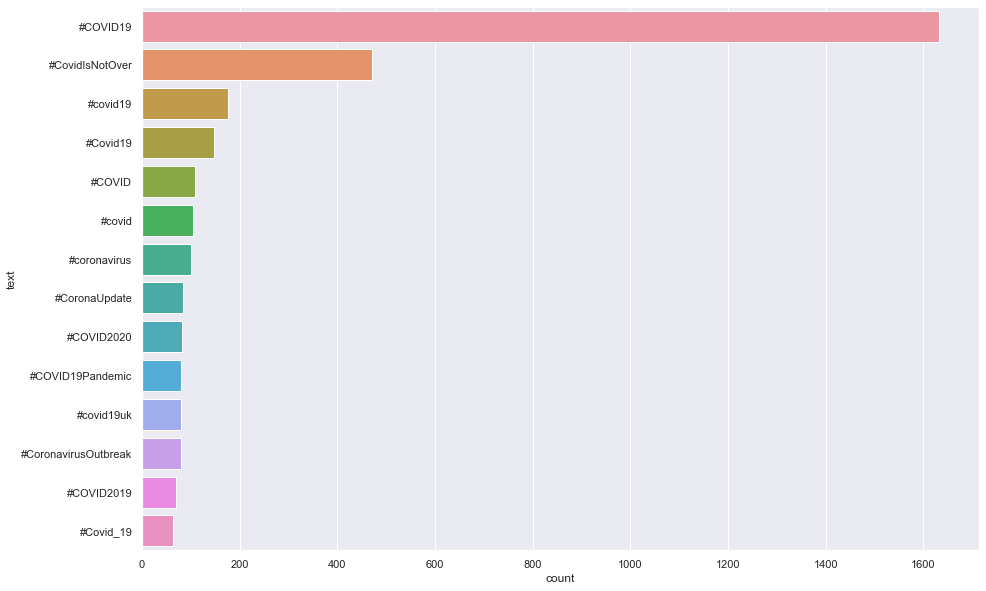

In [113]:
# Plot
ax = sns.barplot(x='count', y='text', data=tweet_text_df_over50)

In [114]:
# Identify all tweets with referecne to covid in text
#repeat for loop looking for text not #
tags = []
for y in [x.split(' ') for x in tweet_text.values]:
    for z in y:
        if 'Covid' in z:
            tags.append(z)
        elif 'covid' in z:
            tags.append(z)
        elif 'COVID' in z:
            tags.append(z)
        elif 'corona' in z:
            tags.append(z)
        elif 'Corona' in z:
            tags.append(z)
            
# Create series to count values in list
tags4 = pd.Series(tags).value_counts()
tags4.head(30)




#COVID19                                              1632
#CovidIsNotOver                                        472
Covid                                                  348
COVID-19                                               267
COVID                                                  198
#covid19                                               176
Covid-19                                               153
#Covid19                                               148
COVID19                                                143
covid                                                  140
#COVID                                                 108
#covid                                                 104
#coronavirus                                           100
Coronavirus                                             94
#CoronaUpdate                                           84
#COVID2020                                              82
#COVID19Pandemic                                        

In [121]:
#convert series into data frame
tweet_text_df2 = pd.DataFrame(tags4).reset_index()

#relable columns
tweet_text_df2.columns = ['text', 'count']

# remove # result
# identify partial string
discard = ['#']
filtered_df2= tweet_text_df2[~tweet_text_df2.text.str.contains('|'.join(discard))]

#output
filtered_df2.head()


,text,count
2,Covid,348
3,COVID-19,267
4,COVID,198
6,Covid-19,153
8,COVID19,143


In [125]:
# show examples of tweets
# Source: Norah's demo
#convert text of tweet from list of tweets
tweets_text_values = tweet_text.values

#crate DataFrame
dft = pd.DataFrame(tweets_text_values)
dft.columns = ['Tweets']
dft.head()

,Tweets
0,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...
1,#COVID19 is linked to more #diabetes diagnoses...
2,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...
3,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...
4,Advanced healthcare at your fingertips\nhttps:...


In [128]:
# filter by key words
subset = dft[dft['Tweets'].str.contains('cases', 'risk')]

# loop though DataFrame and print tweets containing key words
for i in subset.index:
    print('Tweets', i)
    print(subset.loc[i, 'Tweets'], '\n')
          

Tweets 38
More than 90% of those infected with COVID-19 show no symptoms
but the rest of the infected cases had either Type 2 diabetes, cardiovascular diseases, hypertension, and/or cancer, which means people with obesity  show severe symptoms.
#paraphrase
#COVID19
https://t.co/ZEtNx7f4jE 

Tweets 65
The CDC investigates mysterious cases of #PediatricHepatitis. Find out about this and more, including stories on diabetes' effect on #COVID19 outcomes and prioritization of future #cancer prevention for adolescent and young adult cancer survivors.
https://t.co/VlHgXy6Afg 

Tweets 77
Pregnant women have a low risk of having severe symptoms; however, in some cases -- especially those with obesity or gestational diabetes, or who are old, or who have underlying diseases -- they may have severe symptoms. 

#COVID19 https://t.co/4SG3GAMx04 

Tweets 190
Public Health Ontario's latest data on #COVID19 cases in ON, incl TO, is now available: https://t.co/oUxcc69p2S. 

TPH's case counts dashboard is

## 6) Assignment activity 6: 

### 6.1) Report expectations:
- Demonstrate using external function and interpret results.
- Note observations.

In [66]:
# Select channel island data

cov_vac_ci = cov_vac.loc[cov_vac['Province/State'] == 'Channel Islands']
cov_vac_ci.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose,Delta First vs Second Dose,First minus Second Dose
2528,Channel Islands,United Kingdom,49.3723,-2.3644,Others,Northern Europe,0,2020-01-22,0.0,0.0,0.0,0.0,0,0,0,0,0
2529,Channel Islands,United Kingdom,49.3723,-2.3644,Others,Northern Europe,0,2020-01-23,0.0,0.0,0.0,0.0,0,0,0,0,0
2530,Channel Islands,United Kingdom,49.3723,-2.3644,Others,Northern Europe,0,2020-01-24,0.0,0.0,0.0,0.0,0,0,0,0,0
2531,Channel Islands,United Kingdom,49.3723,-2.3644,Others,Northern Europe,0,2020-01-25,0.0,0.0,0.0,0.0,0,0,0,0,0
2532,Channel Islands,United Kingdom,49.3723,-2.3644,Others,Northern Europe,0,2020-01-26,0.0,0.0,0.0,0.0,0,0,0,0,0


In [69]:
# Import necessary libraries.
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [70]:
# Simple hacks to make plots look better: 
# # Colour palette to make charts look better.
blue, = sns.color_palette("muted", 1) 

# Dark grid, white grid, dark, white, and ticks.
sns.set_style('whitegrid') 

# Font size of the axes titles.
plt.rc('axes', titlesize=18) 

# Font size of the x and y labels.
plt.rc('axes', labelsize=14)    

# Font size of the tick labels.
plt.rc('xtick', labelsize=13,color='#4f4e4e') 

# Font size of the tick labels.
plt.rc('ytick', labelsize=13,color='#4f4e4e')  

# Font size of the Legend.
plt.rc('legend', fontsize=13)

# Default text size.
plt.rc('font', size=13) 

0.0

2748.0

Text(0.5, 1.0, 'Hospitalised over time for UK Channel Islands')

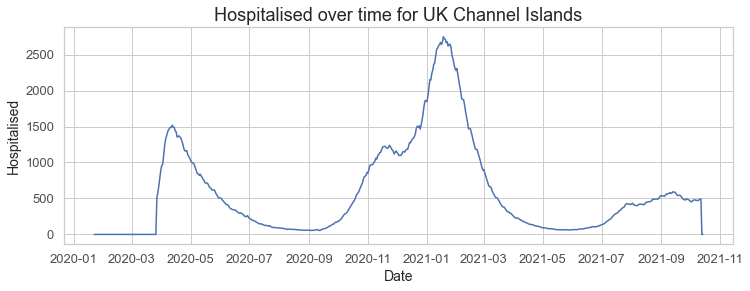

In [72]:
# Create a plot for channel islands
# Calculate max and min.
cov_vac_ci['Hospitalised'].min()
cov_vac_ci['Hospitalised'].max()

# prepare the figure
fig, ax = plt.subplots(figsize = (12, 4))


# Plot the time-series data.
sns.lineplot (ax=ax, x='Date', y='Hospitalised', data=cov_vac_ci)\
.set_title("Hospitalised over time for UK Channel Islands")


In [73]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(12,4))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')
    
    # Plot confidence intervals for smoothed values.
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

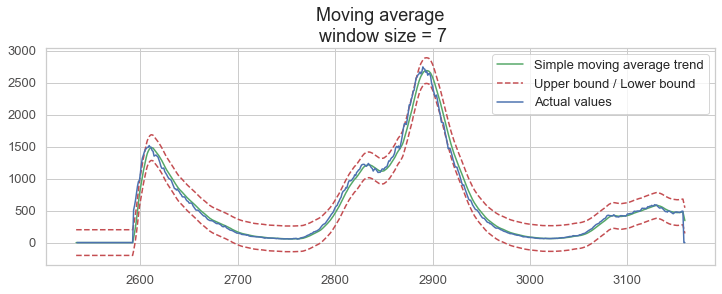

In [75]:
# 5 days:
plot_moving_average(cov_vac_ci.Hospitalised, 7, plot_intervals=True)